In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
df = pd.read_hdf('summary.h5')


new_index = [name.replace('_10yrs', '') for name in df.index]
df.index=new_index


In [4]:
name_dict = {'best18k parallax  HealpixSlicer': 'parallax best 18k',
            'best18k properMotion  HealpixSlicer': 'proper motion best 18k',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': '5-10d microlensing\ndetection',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': '60-90d microlensing\ndetection',
            'fONv MedianNvis fO  HealpixSlicer': 'fO N vis',
            'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer': 'NEO discov\nH<=16',
            'CumulativeCompleteness H <= 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer': 'NEO discov\nH<=22',
            'CumulativeCompleteness H <= 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights detection loss MoObjSlicer': 'TNO discov\nH<=6',
             'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights detection loss MoObjSlicer': 'Vatira discov\nH<=16',
             'Total detected SNNSNMetric_nSN  HealpixSlicer': 'SNe, N',
             'Median SNNSNMetric_zlim  HealpixSlicer': 'SNe, zlim',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer': '3x2 i-band',
            'Median WeakLensingNvisits i band non-DD HealpixSlicer': 'WL Nvis i-band',
            'Sum PrestoKNe__scoreS  UserPointsSlicer': 'KNe Presto S',
            'Total detected XRBPopMetric__early_detect  UserPointsSlicer': 'XRB\nearly detect',
            'VolumeSum Brown Dwarf, L7  HealpixSlicer': 'Brown Dwarf Vol',}
invert_cols = ['parallax best 18k', 'proper motion best 18k']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = df[key]

mag_name_dict = {}
for filtername in 'ugrizy':
    mag_name_dict['Median CoaddM5 %s HealpixSlicer' % filtername] = filtername

mag_data = pd.DataFrame()
for key in mag_name_dict:
    mag_data[mag_name_dict[key]] = df[key]


In [5]:
df

metric,Mean SNSLMetric DD:ELAISS1 all bands HealpixSubsetSlicer,Median SNSLMetric DD:ELAISS1 all bands HealpixSubsetSlicer,Sum SNSLMetric DD:ELAISS1 all bands HealpixSubsetSlicer,Median DD:ELAISS1 NVisits all bands HealpixSubsetSlicer,Median DD:ELAISS1 N Unique Nights all bands HealpixSubsetSlicer,Mean SNSLMetric DD:XMM_LSS all bands HealpixSubsetSlicer,Median SNSLMetric DD:XMM_LSS all bands HealpixSubsetSlicer,Sum SNSLMetric DD:XMM_LSS all bands HealpixSubsetSlicer,Median DD:XMM_LSS NVisits all bands HealpixSubsetSlicer,Median DD:XMM_LSS N Unique Nights all bands HealpixSubsetSlicer,...,"Median WFD, 5-sigma z z HealpixSubsetSlicer","Median WFD, Count z z HealpixSubsetSlicer","Mean Median Inter-Night Gap, EDFS z note like DD:EDFS% and z UserPointsSlicer","Mean Median Inter-Night Gap, XMM_LSS z note like DD:XMM_LSS% and z UserPointsSlicer","Mean Median Inter-Night Gap, COSMOS g note like DD:COSMOS% and g UserPointsSlicer","Mean Median Inter-Night Gap, ECDFS u note like DD:ECDFS% and u UserPointsSlicer","Mean Median Inter-Night Gap, XMM_LSS i note like DD:XMM_LSS% and i UserPointsSlicer","Mean Median Inter-Night Gap, COSMOS z note like DD:COSMOS% and z UserPointsSlicer","Mean Median Inter-Night Gap, EDFS i note like DD:EDFS% and i UserPointsSlicer","Mean Median Inter-Night Gap, ECDFS y note like DD:ECDFS% and y UserPointsSlicer"
no_twilight_neo_v2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.534672,162.0,14.994748,13.926517,7.988726,22.982526,7.992708,13.936877,8.019297,8.001608
twi_neo_brightest_repeat3_iz_np1_v2.2,0.000010,0.000010,0.015213,9755.0,498.0,0.000011,0.000011,0.016769,10069.0,537.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
twi_neo_brightest_repeat3_iz_np2_v2.2,0.000010,0.000010,0.014791,9882.0,484.0,0.000010,0.000010,0.014601,9965.0,494.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
twi_neo_brightest_repeat3_iz_np3_v2.2,0.000010,0.000010,0.014723,9747.0,482.0,0.000010,0.000010,0.014684,9959.0,493.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
twi_neo_brightest_repeat3_iz_np4_v2.2,0.000009,0.000009,0.013492,9888.0,477.0,0.000010,0.000010,0.014311,9852.0,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
twi_neo_repeat4_z_np3_v2.2,0.000009,0.000009,0.013452,10324.0,482.0,0.000010,0.000010,0.015146,10788.0,503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
twi_neo_repeat4_z_np4_v2.2,0.000010,0.000010,0.014704,10297.0,485.0,0.000010,0.000010,0.015201,10733.0,497.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
twi_neo_repeat4_z_np5_v2.2,0.000009,0.000009,0.014093,10365.0,484.0,0.000011,0.000011,0.015937,10802.0,512.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
twi_neo_repeat4_z_np6_v2.2,0.000009,0.000009,0.013980,10308.0,484.0,0.000010,0.000010,0.014803,10750.0,502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


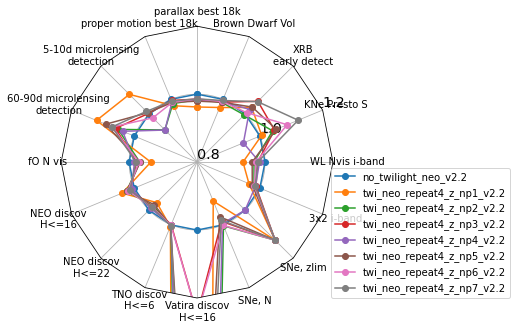

In [7]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat4_z_' in run and 'bright' not in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

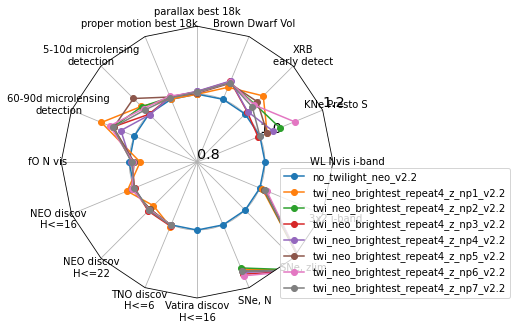

In [8]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat4_z_' in run and 'bright' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

In [9]:
ndata

,parallax best 18k,proper motion best 18k,5-10d microlensing\ndetection,60-90d microlensing\ndetection,fO N vis,NEO discov\nH<=16,NEO discov\nH<=22,TNO discov\nH<=6,Vatira discov\nH<=16,"SNe, N","SNe, zlim",3x2 i-band,WL Nvis i-band,KNe Presto S,XRB\nearly detect,Brown Dwarf Vol
no_twilight_neo_v2.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00,1.000000,1.0,1.000000,1.000000,1.000000
twi_neo_brightest_repeat4_z_np1_v2.2,0.999658,1.000684,1.031785,1.104773,0.967431,1.022820,0.981558,1.005671,NaN,1.142158,1.25,1.008357,NaN,1.023256,1.075518,1.038402
twi_neo_brightest_repeat4_z_np2_v2.2,1.006755,1.006627,1.030562,1.067986,0.986731,1.006028,0.995913,1.001022,NaN,1.137218,1.25,1.012293,NaN,1.063953,1.040804,1.053619
twi_neo_brightest_repeat4_z_np3_v2.2,1.007442,1.007510,0.999389,1.069150,0.991556,0.999139,1.003570,1.004094,NaN,1.157022,1.25,1.018690,NaN,0.994186,1.009135,1.057137
twi_neo_brightest_repeat4_z_np4_v2.2,1.008461,1.007836,0.996944,1.042841,0.993969,NaN,NaN,NaN,NaN,1.151315,1.25,NaN,NaN,1.040698,1.010353,1.058532
twi_neo_brightest_repeat4_z_np5_v2.2,1.002566,1.007323,1.064792,1.066123,0.985525,1.007966,0.995605,1.001229,NaN,1.147006,1.25,1.013647,NaN,1.023256,1.051157,1.050730
twi_neo_brightest_repeat4_z_np6_v2.2,1.005046,1.010470,1.022616,1.078231,0.987937,1.006674,0.997998,1.000961,NaN,1.162120,1.25,1.021699,NaN,1.110465,1.037759,1.054139
twi_neo_brightest_repeat4_z_np7_v2.2,1.006374,1.004863,1.017115,1.067288,0.992762,0.999785,1.000996,1.001774,NaN,1.147391,1.25,1.015023,NaN,1.000000,1.029842,1.052889


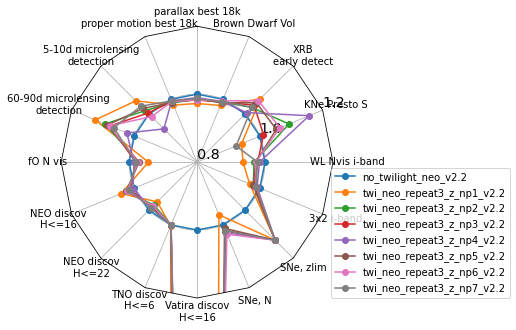

In [7]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat3_z_' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

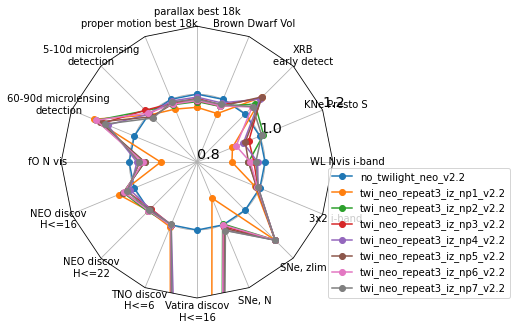

In [8]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat3_iz_' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

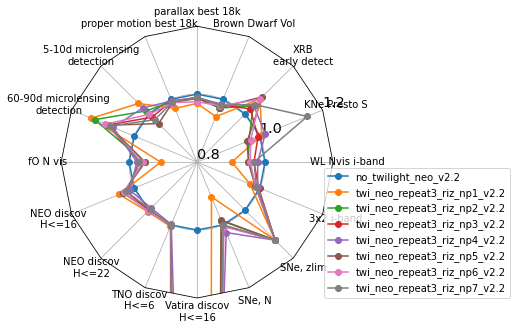

In [9]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat3_riz_' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

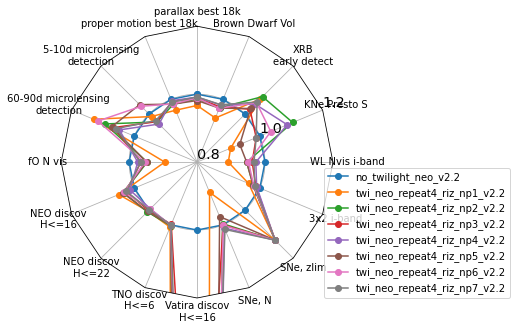

In [10]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat4_riz_' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

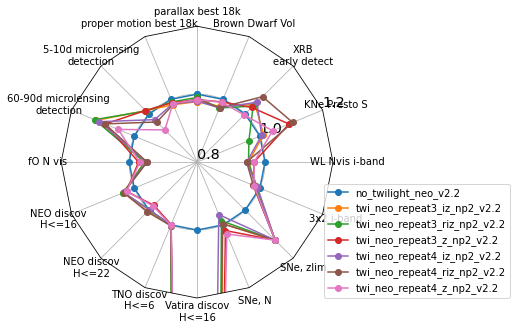

In [11]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'np2' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

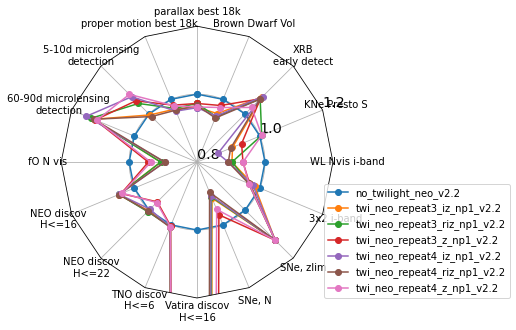

In [12]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'np1' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

In [13]:
df['CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights detection loss MoObjSlicer']*10000

no_twilight_neo_v2.2              4.0
twi_neo_repeat3_iz_np1_v2.2     181.0
twi_neo_repeat3_iz_np2_v2.2      64.0
twi_neo_repeat3_iz_np3_v2.2      46.0
twi_neo_repeat3_iz_np4_v2.2      15.0
twi_neo_repeat3_iz_np5_v2.2      66.0
twi_neo_repeat3_iz_np6_v2.2      62.0
twi_neo_repeat3_iz_np7_v2.2      47.0
twi_neo_repeat3_riz_np1_v2.2    162.0
twi_neo_repeat3_riz_np2_v2.2     58.0
twi_neo_repeat3_riz_np3_v2.2     40.0
twi_neo_repeat3_riz_np4_v2.2     14.0
twi_neo_repeat3_riz_np5_v2.2     42.0
twi_neo_repeat3_riz_np6_v2.2     56.0
twi_neo_repeat3_riz_np7_v2.2     39.0
twi_neo_repeat3_z_np1_v2.2       96.0
twi_neo_repeat3_z_np2_v2.2       27.0
twi_neo_repeat3_z_np3_v2.2       20.0
twi_neo_repeat3_z_np4_v2.2       15.0
twi_neo_repeat3_z_np5_v2.2       34.0
twi_neo_repeat3_z_np6_v2.2       19.0
twi_neo_repeat3_z_np7_v2.2       18.0
twi_neo_repeat4_iz_np1_v2.2     102.0
twi_neo_repeat4_iz_np2_v2.2      22.0
twi_neo_repeat4_iz_np3_v2.2      19.0
twi_neo_repeat4_iz_np4_v2.2      18.0
twi_neo_repe

Text(0, 0.5, 'Vatrias H<=16 (N/10,000)')

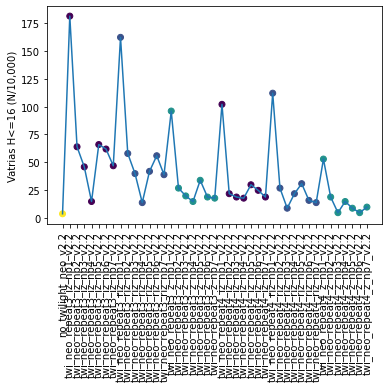

In [14]:
fig, ax = plt.subplots()

color_mapping = {'_iz_': 0, '_riz_': 1, '_z_': 2, 'no_': 4}

colors = []
for rn in df.index:
    for key in color_mapping:
        if key in rn:
            colors.append(color_mapping[key])

            
yvals = df['CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights detection loss MoObjSlicer']*10e3
ax.plot(yvals)

ack = ax.tick_params('x',  rotation=90)
ax.scatter(np.arange(yvals.size), yvals, c=colors )
ax.set_ylabel('Vatrias H<=16 (N/10,000)')

Text(0.5, 1.0, 'Observing Every Other Night')

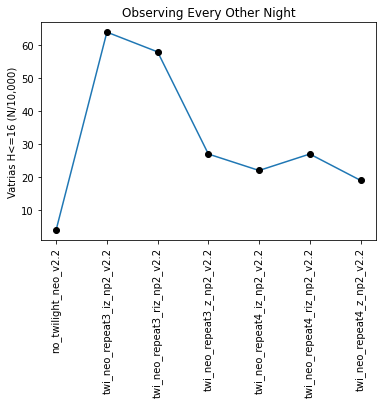

In [15]:
fig, ax = plt.subplots()

color_mapping = {'_iz_': 0, '_riz_': 1, '_z_': 2, 'no_': 4}

colors = []
for rn in df.index:
    for key in color_mapping:
        if key in rn:
            colors.append(color_mapping[key])

            

runs = [run for run in df.index if 'no_twi' in run] + [run for run in df.index if 'np2' in run]            
yvals = df['CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights detection loss MoObjSlicer'].loc[runs]*10e3
ax.plot(yvals)

ack = ax.tick_params('x',  rotation=90)
ax.plot(np.arange(yvals.size), yvals, 'ko' )
ax.set_ylabel('Vatrias H<=16 (N/10,000)')
ax.set_title('Observing Every Other Night')

In [16]:
[col for col in df if 'Vatira' in col and 'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances' in col]

['CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights trailing loss MoObjSlicer',
 'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 30 nights trailing loss MoObjSlicer',
 'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights detection loss MoObjSlicer',
 'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 30 nights detection loss MoObjSlicer',
 'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 4 pairs in 20 nights detection loss MoObjSlicer',
 'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 triplets in 30 nights detection loss MoObjSlicer',
 'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 1 quad in 1 night detection loss MoObjSlicer',
 'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights SNR=5 detection loss MoObjSlicer',
 'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances 

Text(0.5, 1.0, 'Observing Every Other Night')

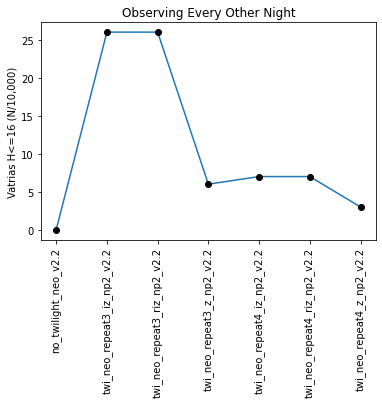

In [17]:
fig, ax = plt.subplots()

color_mapping = {'_iz_': 0, '_riz_': 1, '_z_': 2, 'no_': 4}

colors = []
for rn in df.index:
    for key in color_mapping:
        if key in rn:
            colors.append(color_mapping[key])

            

runs = [run for run in df.index if 'no_twi' in run] + [run for run in df.index if 'np2' in run]            
yvals = df['CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 4 pairs in 20 nights detection loss MoObjSlicer'].loc[runs]*10e3
ax.plot(yvals)

ack = ax.tick_params('x',  rotation=90)
ax.plot(np.arange(yvals.size), yvals, 'ko' )
ax.set_ylabel('Vatrias H<=16 (N/10,000)')
ax.set_title('Observing Every Other Night')

Text(0.5, 1.0, 'Observing Every Other Night')

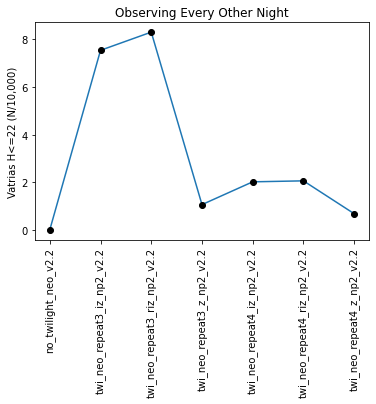

In [18]:
fig, ax = plt.subplots()

color_mapping = {'_iz_': 0, '_riz_': 1, '_z_': 2, 'no_': 4}

colors = []
for rn in df.index:
    for key in color_mapping:
        if key in rn:
            colors.append(color_mapping[key])

            

runs = [run for run in df.index if 'no_twi' in run] + [run for run in df.index if 'np2' in run]            
yvals = df['CumulativeCompleteness H <= 22.000000 Discovery_N_Chances Vatira 4 pairs in 20 nights detection loss MoObjSlicer'].loc[runs]*10e3
ax.plot(yvals)

ack = ax.tick_params('x',  rotation=90)
ax.plot(np.arange(yvals.size), yvals, 'ko' )
ax.set_ylabel('Vatrias H<=22 (N/10,000)')
ax.set_title('Observing Every Other Night')